In [1]:
import numpy as np
import pandas as pd

# read data file
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/train.csv")

# Exploratory Data Analysis

### Check For Missing Values

In [2]:
train.isnull().sum()
# Age is missing 177 rows of data
# cabin is missing 687 rows of data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# convert categorical columns to pandas categorical data type
train['Survived'] = pd.Categorical(train.Survived)
train['Pclass'] = pd.Categorical(train.Pclass)
train['Sex'] = pd.Categorical(train.Sex)
train['Embarked'] = pd.Categorical(train.Embarked)

### Handle Missing Values Found

In [5]:
# only two observations missings embarked value - can be dropped
train = train[train['Embarked'].notna()].reset_index(drop=True)

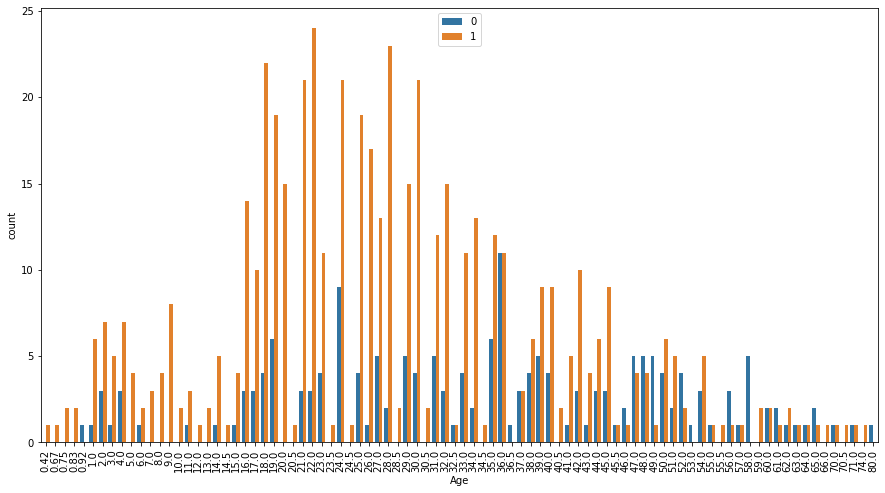

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# determine why there are so many missing cabin values
# age vs cabin
# - dataframe of null cabin values and non-null
cabin_present = [1 if pd.isna(value) else 0 for value in list(train['Cabin'].to_numpy())]
cabin_present = pd.DataFrame(cabin_present)

# - plot bar graph of age and cabins present
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Age', hue = cabin_present[0], data = train)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

train.drop('Cabin', 1, inplace=True)

Some Important Findings:
* cabin data is missing for almost all
* does not seem to be correlated with the way its missing
* beneficial to drop cabin column as it may add extra noise

<AxesSubplot:xlabel='Survived', ylabel='Age'>

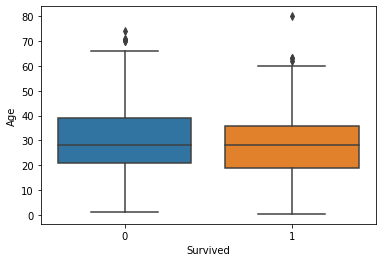

In [7]:
# determine relationship between age and survival
sns.boxplot(y="Age", x="Survived", data=train)


Some Important Findings:
* 0 means not survived and 1 means survived
* some discrepancies

In [8]:
# a lot of missing age values
# however, age could be a factor to aid in predicting if someone survived or not
# impute average age based on titles

# - extract titles from names
def title(row):
    name = row['Name']
    for name in name.split():
        if '.' in name:
            return name
            break
train['Title'] = train.apply(lambda row: title(row), axis=1)

# -- fill in missing age values based on the average age grouped by title
train['Age'] = train.groupby('Title')["Age"].transform(lambda group: group.fillna(group.mean()))

train.info()
# now there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    category
 11  Title        889 non-null    object  
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


In [9]:
# PassengerId and Name not needed for prediction
train.drop('PassengerId', 1, inplace=True)
train.drop('Name', 1, inplace=True)
# Title being dropped as Pclass, Fare, and Sex will indicate the gender and the type of expense the passenger is willing to take
# Title not needed anymore
train.drop('Title', 1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


### Check For Wrong Entries or Special Characters

In [10]:
for col in train.columns:
        print('{} : {}'.format(col,train[col].unique()))
# no wrong entries or special characters

Survived : [0, 1]
Categories (2, int64): [0, 1]
Pclass : [3, 1, 2]
Categories (3, int64): [1, 2, 3]
Sex : ['male', 'female']
Categories (2, object): ['female', 'male']
Age : [22.         38.         26.         35.         32.36809045 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         35.65420561 34.         15.
 28.          8.         19.         21.66206897 40.         66.
 42.         21.         18.          3.          7.         49.
 29.         65.         28.5         5.         11.         45.
  4.57416667 17.         32.         16.         25.          0.83
 30.         33.         23.         24.         46.         59.
 71.         37.         47.         14.5        70.5        32.5
 12.          9.         36.5        51.         55.5        40.5
 44.          1.         61.         56.         50.         36.
 45.5        20.5        62.         41.         52.         63.
 23.5         0.92       43.         60.  

### Distribution of Each Predictor

<AxesSubplot:xlabel='Survived', ylabel='count'>

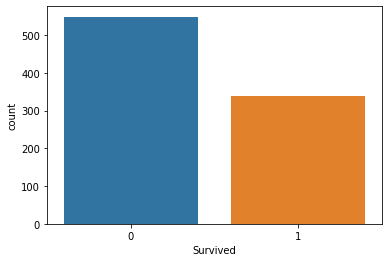

In [11]:
# Distribution of Survived
sns.countplot(x="Survived", data=train)

More passengers that didn't survive vs that did survive. **Slight class imbalance present**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

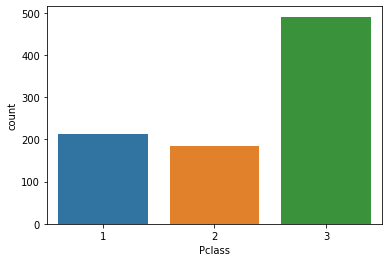

In [12]:
# Distribution of Pclass
sns.countplot(x="Pclass", data=train)

More individuals that were in ticket class three than the upper level classes. **Class imbalance present**

<AxesSubplot:xlabel='Sex', ylabel='count'>

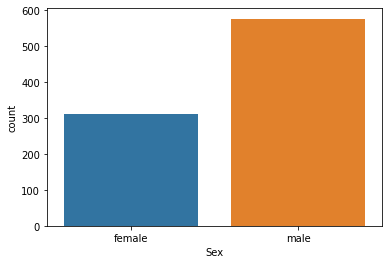

In [13]:
# Distribution of Sex
sns.countplot(x="Sex", data=train)

More male than female passengers. **Class imbalance present**

<AxesSubplot:xlabel='Embarked', ylabel='count'>

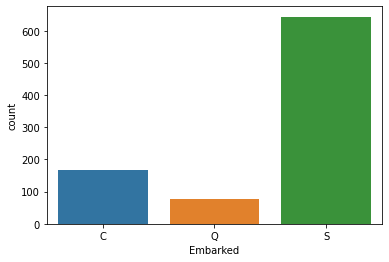

In [14]:
# Distribution of Embarked
sns.countplot(x="Embarked", data=train)

A lot more embarked from S than any other class. **Major class imbalance present**

<AxesSubplot:xlabel='Age', ylabel='Count'>

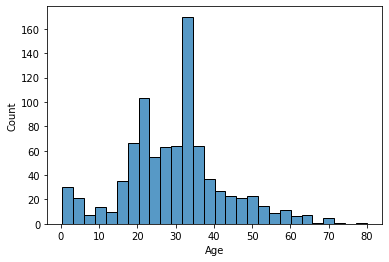

In [15]:
# Distribution of Age
sns.histplot(x="Age", data=train)

Fairly normal distribution, however there are **two peaks present** and some outliers present

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

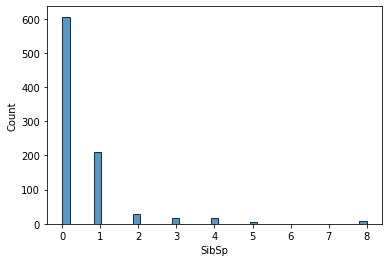

In [16]:
# Distribution of SibSp
sns.histplot(x="SibSp", data=train)

Similar to exponential distribution, however may be due to the fact that there can't be negative SibSp
* Some outliers present as well

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

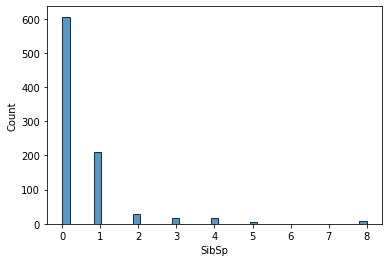

In [17]:
# Distribution of SibSp
sns.histplot(x="SibSp", data=train)

### Analyze Relationship Between Predictors

<AxesSubplot:>

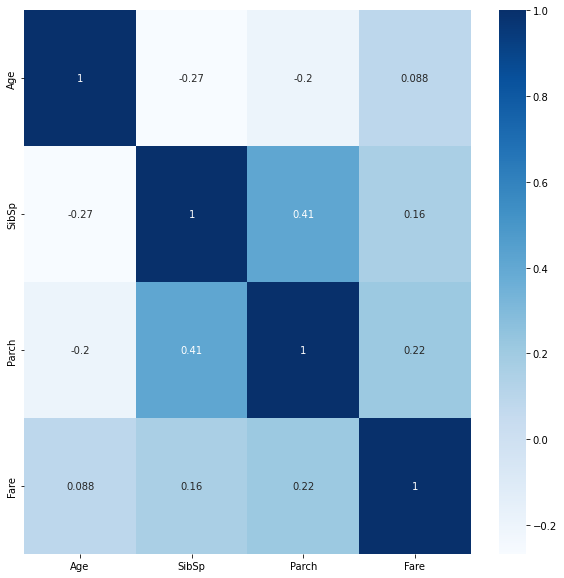

In [18]:
# Correlation Matrix of Numerical Features
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),cbar=True,annot=True,cmap='Blues')

Some Important Findings:
* considerable correlation between SibSp (number of siblings or spouses) and Parch (number of parents or children)
    * it makes sense to see this correlation
* no other heavy correlations between numerical features

In [19]:
train.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked    category
dtype: object

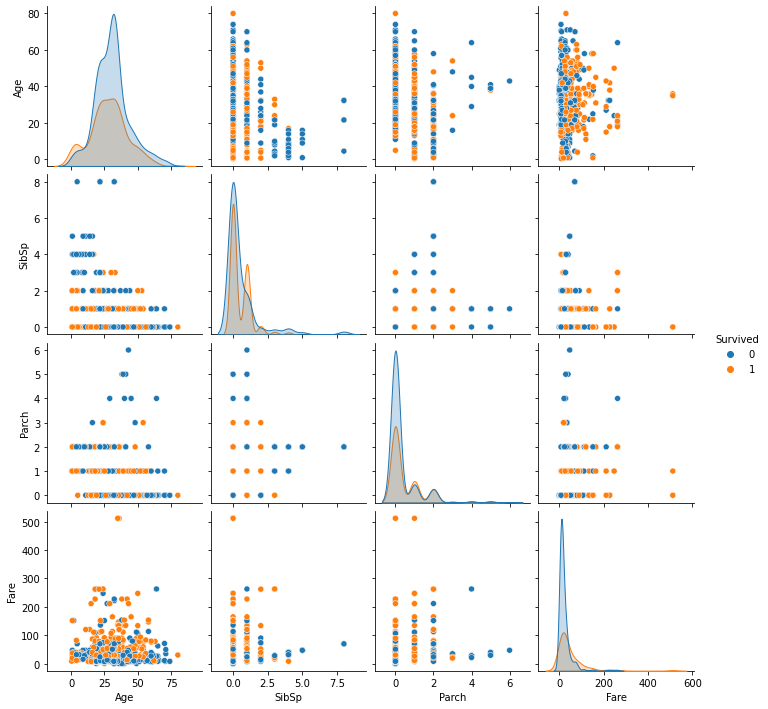

In [20]:
# Pairplot of Numerical Features with Respect to those that Survived and Didnt
sns.pairplot(train, hue = 'Survived')
# reminder: 0 indicates not survived, 1 indicates survived

Some Important Findings:
* Regardless of age, more people tended to survive with higher fares than those with lower fares
    * this could be because higher fared cabins could be at a safer location
    * lower Parch and Higher fare also contained more survivors
* Lower Parch and SibSp tended have more people survive

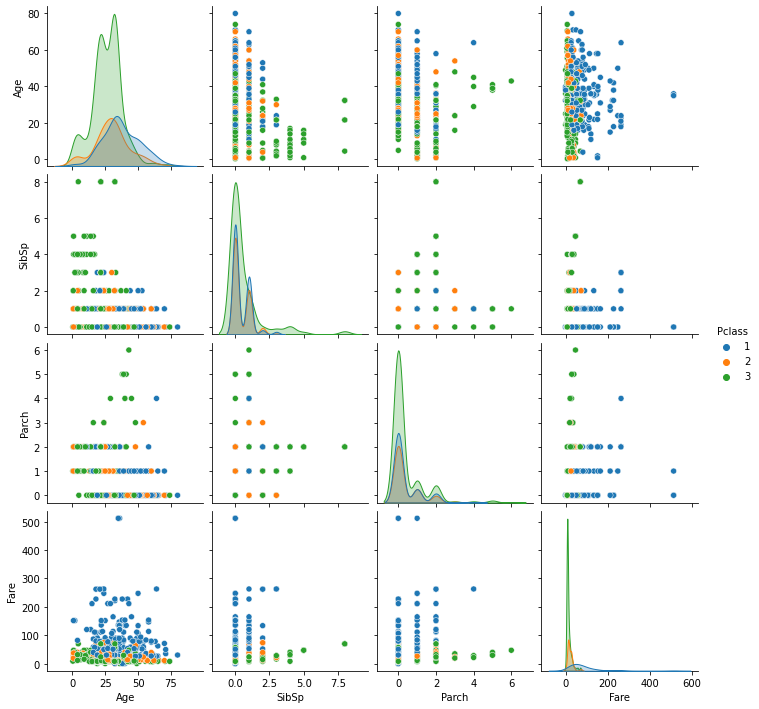

In [21]:
# Pairplot of Numerical Features with Respect to Pclass (Ticket Class: 	1 = 1st, 2 = 2nd, 3 = 3rd)
sns.pairplot(train, hue = 'Pclass')

Some Important Findings:
* Makes sense but lower the fare the higher the Pclass regarless of any other feature it is against
* More individuals that were older tended to be in higher ticket classes

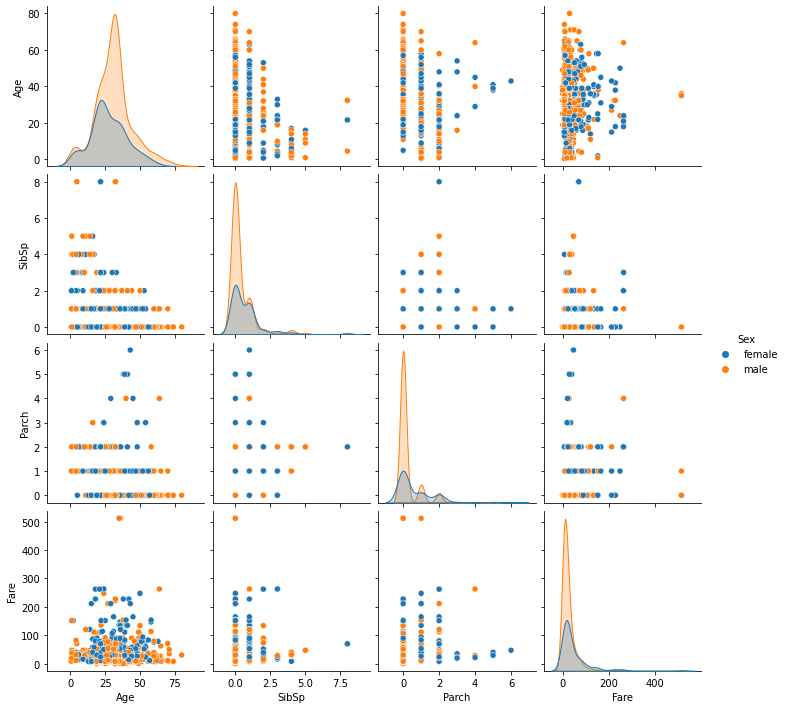

In [22]:
# Pairplot of Numerical Features with Respect to Sex
sns.pairplot(train, hue = 'Sex')

Some Important Findings:
* More females tended to pay for higher fare than men (there may also be more females in higher ticket classes because of this)
* Other than fare, male and female tended to be mixed

In [23]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0,0,211536,13.0000,S
885,1,1,female,19.000000,0,0,112053,30.0000,S
886,0,3,female,21.662069,1,2,W./C. 6607,23.4500,S
887,1,1,male,26.000000,0,0,111369,30.0000,C
